In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('../logs/exp_v4_augmentation_with_deviations/version_1/inference/errors.pkl', 'rb') as f:
    metrics = pickle.load(f)
    
    print(metrics)

{'predicted_distances': [145.3461151123047, 494.0245056152344, 111.9216079711914, 524.5279541015625, 194.34857177734375, 374.5699768066406, 273.69915771484375, 330.43206787109375, 143.5252227783203, 228.02516174316406, 257.1856689453125, 308.9258117675781, 283.3213806152344, 453.4424133300781, 302.3100280761719, 204.47308349609375, 164.52786254882812, 304.5971984863281, 152.8474884033203, 174.14700317382812, 436.3395080566406, 341.7201232910156, 149.87081909179688, 236.69366455078125, 367.5711364746094, 62.218299865722656, 240.2356719970703, 215.71859741210938, 433.74774169921875, 543.8031005859375, 416.5393371582031, 464.4785461425781, 172.57449340820312, 284.4526062011719, 335.7568664550781, 81.29505157470703, 61.29401397705078], 'gt_distances': [135.60156594559788, 450.0663230243714, 117.76041502142832, 566.4006462453999, 198.91497268699987, 339.5086504783634, 276.6450432846269, 330.477842395234, 126.95917576028052, 228.97280827158554, 280.0256992667419, 290.9181847755184, 277.07801

In [4]:
metrics.keys()

dict_keys(['predicted_distances', 'gt_distances', 'signed_errors', 'abs_errors', 'l2_errors', 'width_deviation', 'height_deviation', 'x_mid_deviation', 'y_mid_deviation'])

In [1]:
for key, value in metrics.items():
    metrics[key] = np.array(value)

number_of_columns = 5
number_of_rows = 2+5

# Create a 1x2 grid of plots
plt.figure(figsize=(5*number_of_columns, 5*number_of_rows))
plt.subplot(number_of_rows, number_of_columns, 1)  # First subplot for Predicted vs. GT distance
plt.plot(metrics['gt_distances'], metrics['predicted_distances'], 'o')
plt.plot(metrics['gt_distances'], metrics['gt_distances'], "--")
plt.title("Predicted vs. GT distance")
plt.xlabel("GT distance (m)")
plt.ylabel("Predicted distance (m)")
plt.grid(which="both")
plt.minorticks_on()
plt.tick_params(which="minor", bottom=False, left=False)

# Calculate percentage error
percentage_error = 100 * (metrics['predicted_distances'] - metrics['gt_distances']) / metrics['gt_distances']

plt.subplot(number_of_rows, number_of_columns, 2)  # Second subplot for Percentage Error
plt.plot(metrics['gt_distances'], percentage_error, 'o')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title("Percentage Error vs. GT distance")
plt.xlabel("GT distance (m)")
plt.ylabel("Percentage Error (%)")
plt.grid(which="both")
plt.minorticks_on()
plt.tick_params(which="minor", bottom=False, left=False)

plt.subplot(number_of_rows, number_of_columns, 3)
ypbot = np.percentile(percentage_error, 1)
yptop = np.percentile(percentage_error, 99)
ypad = 0.2*(yptop - ypbot)
ymin = ypbot - ypad
ymax = yptop + ypad

plt.plot(metrics['gt_distances'], percentage_error, 'o')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.title("Percentage Error vs. GT distance (no outliers)")
plt.xlabel("GT distance (m)")
plt.ylabel("Percentage Error (%)")
plt.grid(which="both")
plt.minorticks_on()
plt.tick_params(which="minor", bottom=False, left=False)
plt.ylim([ymin, ymax])


plt.subplot(number_of_rows, number_of_columns, 4)
plt.hist(metrics["abs_errors"], bins=50, edgecolor='black')
plt.title("Histogram of Absolute Errors")
plt.xlabel("Absolute Error (m)")
plt.ylabel("Frequency")

plt.subplot(number_of_rows, number_of_columns, 5)
metrics_txt = f'''Total samples: {len(metrics['abs_errors'])}

Average absolute error: {np.mean(metrics['abs_errors'])} (m)
Average l2 error (RMSE): {np.sqrt(np.mean(metrics['l2_errors']))} (m)
Average abs. percentage error: {np.mean(np.abs(percentage_error))} (%)

Standard deviation of absolute error: {np.std(metrics['abs_errors'])} (m)
Standard deviation of l2 error: {np.std(metrics['l2_errors'])} (m)
Standard deviation of abs. percentage error: {np.std(np.abs(percentage_error))} (%)
'''

plt.text(0.5, 0.5, metrics_txt, fontsize=12, ha='center', va='center')
plt.axis('off')  # Turn off axes for this subplot

deviation_txt = "For one deviation plot, the other deviations may not be 0.\n\n"
for i, deviation_type in enumerate(["width_deviation", "height_deviation", "x_mid_deviation", "y_mid_deviation"]):
    
    deviation_txt += f"Average absolute/percentage error for {deviation_type}:\n"
    deviation_txt_abs = ""
    deviation_txt_percentage = ""
    for deviation_i, deviation in enumerate([-1, 0, 1, 2, 3]):
        predicted_distances_deviated = metrics['predicted_distances'][metrics[deviation_type] == deviation]
        gt_distances_deviated = metrics['gt_distances'][metrics[deviation_type] == deviation]
        plt.subplot(number_of_rows, number_of_columns, number_of_columns*1+1+i)
        plt.plot(gt_distances_deviated, predicted_distances_deviated, 'o', alpha=0.2)
        
        deviation_txt_abs += f"{deviation}: {np.mean(metrics['abs_errors'][metrics[deviation_type] == deviation]):.2f}, "
        deviation_txt_percentage += f"{deviation}: {np.mean(np.abs(percentage_error[metrics[deviation_type] == deviation])):.2f}, "
        
        plt.subplot(number_of_rows, number_of_columns, number_of_columns*2+1+i+deviation_i*number_of_columns)
        plt.plot(gt_distances_deviated, predicted_distances_deviated, 'o')
        
    deviation_txt += f"{deviation_txt_abs}(m)\n{deviation_txt_percentage}(%)\n\n"
    plt.subplot(number_of_rows, number_of_columns, 6+i)
    plt.plot(metrics['gt_distances'], metrics['gt_distances'], "--")
    plt.title(f"Predicted vs. GT distance\nfor different {deviation_type}")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Predicted distance (m)")
    plt.legend(["-1", "0", "1", "2", "3"])
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    for deviation_i, deviation in enumerate([-1, 0, 1, 2, 3]):
        plt.subplot(number_of_rows, number_of_columns, number_of_columns*2+1+i+deviation_i*number_of_columns)
        plt.plot(metrics['gt_distances'], metrics['gt_distances'], "--")
        plt.title(f"Predicted vs. GT distance\nfor {deviation_type} = {deviation}")
        plt.xlabel("GT distance (m)")
        plt.ylabel("Predicted distance (m)")
        plt.grid(which="both")
        plt.minorticks_on()
        plt.tick_params(which="minor", bottom=False, left=False)


plt.subplot(number_of_rows, number_of_columns, 10)
plt.text(0.5, 0.5, deviation_txt, fontsize=12, ha='center', va='center')
plt.axis('off')  # Turn off axes for this subplot

plt.tight_layout()  # Adjust the spacing between subplots
plt.savefig('metrics.png')


NameError: name 'metrics' is not defined

In [5]:
(metrics["width_deviation"] == deviation).shape

(7879,)

In [6]:
metrics['predicted_distances'][metrics["width_deviation"] == deviation]

array([379.90133667, 301.9493103 , 201.95457458, 132.81750488,
       150.34025574,  10.92673016, 111.47450256, 304.88491821,
        33.17887115, 146.28726196, 549.55249023, 105.2838974 ,
       525.07800293, 267.41558838, 305.34451294, 345.95288086,
       444.8274231 ,  20.50026131,  99.73418427,  77.68121338,
       193.63928223, 198.71151733, 227.82392883,   1.53388131,
       203.79878235, 256.52166748, 159.26144409, 355.12695312,
       222.71577454, 204.45396423, 247.99308777, 111.91542053,
        87.38988495, 287.42709351, 411.45773315, 410.64651489,
       338.31942749, 177.88552856, 191.82829285, 266.10821533,
       216.50344849, 279.2394104 , 335.85855103, 110.90849304,
       295.04910278,  79.92402649, 555.43713379, 355.77923584,
        78.34393311, 349.58651733, 406.37741089, 153.71406555,
        95.33524323, 245.05281067, 123.64958954, 186.1449585 ,
       205.68522644, 179.13644409, 168.42230225, 119.55280304,
        83.56787872, 391.19796753, 322.93463135, 485.44

from c++

In [20]:
len(predicted_gt_deep)

4669

classical
[   0  130  260  390  520  650  780  910 1040 1170 1300] [6.852307269076305, 60.3890519729425, 164.68773969343064, 260.0695636734694, 316.177171641791, 410.974, 493.8757571428571, 705.5996720588237, 872.941142857143, 708.5153999999999, 895.384560669145]
[   0  130  260  390  520  650  780  910 1040 1170 1300] [23.893302092655635, 111.52977420874376, 183.31315467024413, 165.15826615949985, 104.99708442713633, 122.07336817178188, 190.90185070143548, 134.98288658947698, 27.091297898711584, 230.19111910375688, 326.5259173122863]
deep
[   0  130  260  390  520  650  780  910 1040 1170 1300] [24.755456145552564, 60.382784071494896, 133.06900223293172, 221.33433586337762, 307.1592915311005, 305.47727605633804, 352.0751428571429, 242.5542195121951, 243.18991666666668, 464.0346666666667, 719.241]
[   0  130  260  390  520  650  780  910 1040 1170 1300] [87.40494875607027, 116.164250244894, 176.04785414212463, 198.9871123117687, 185.18448882206283, 150.28831397250377, 146.8782397511904

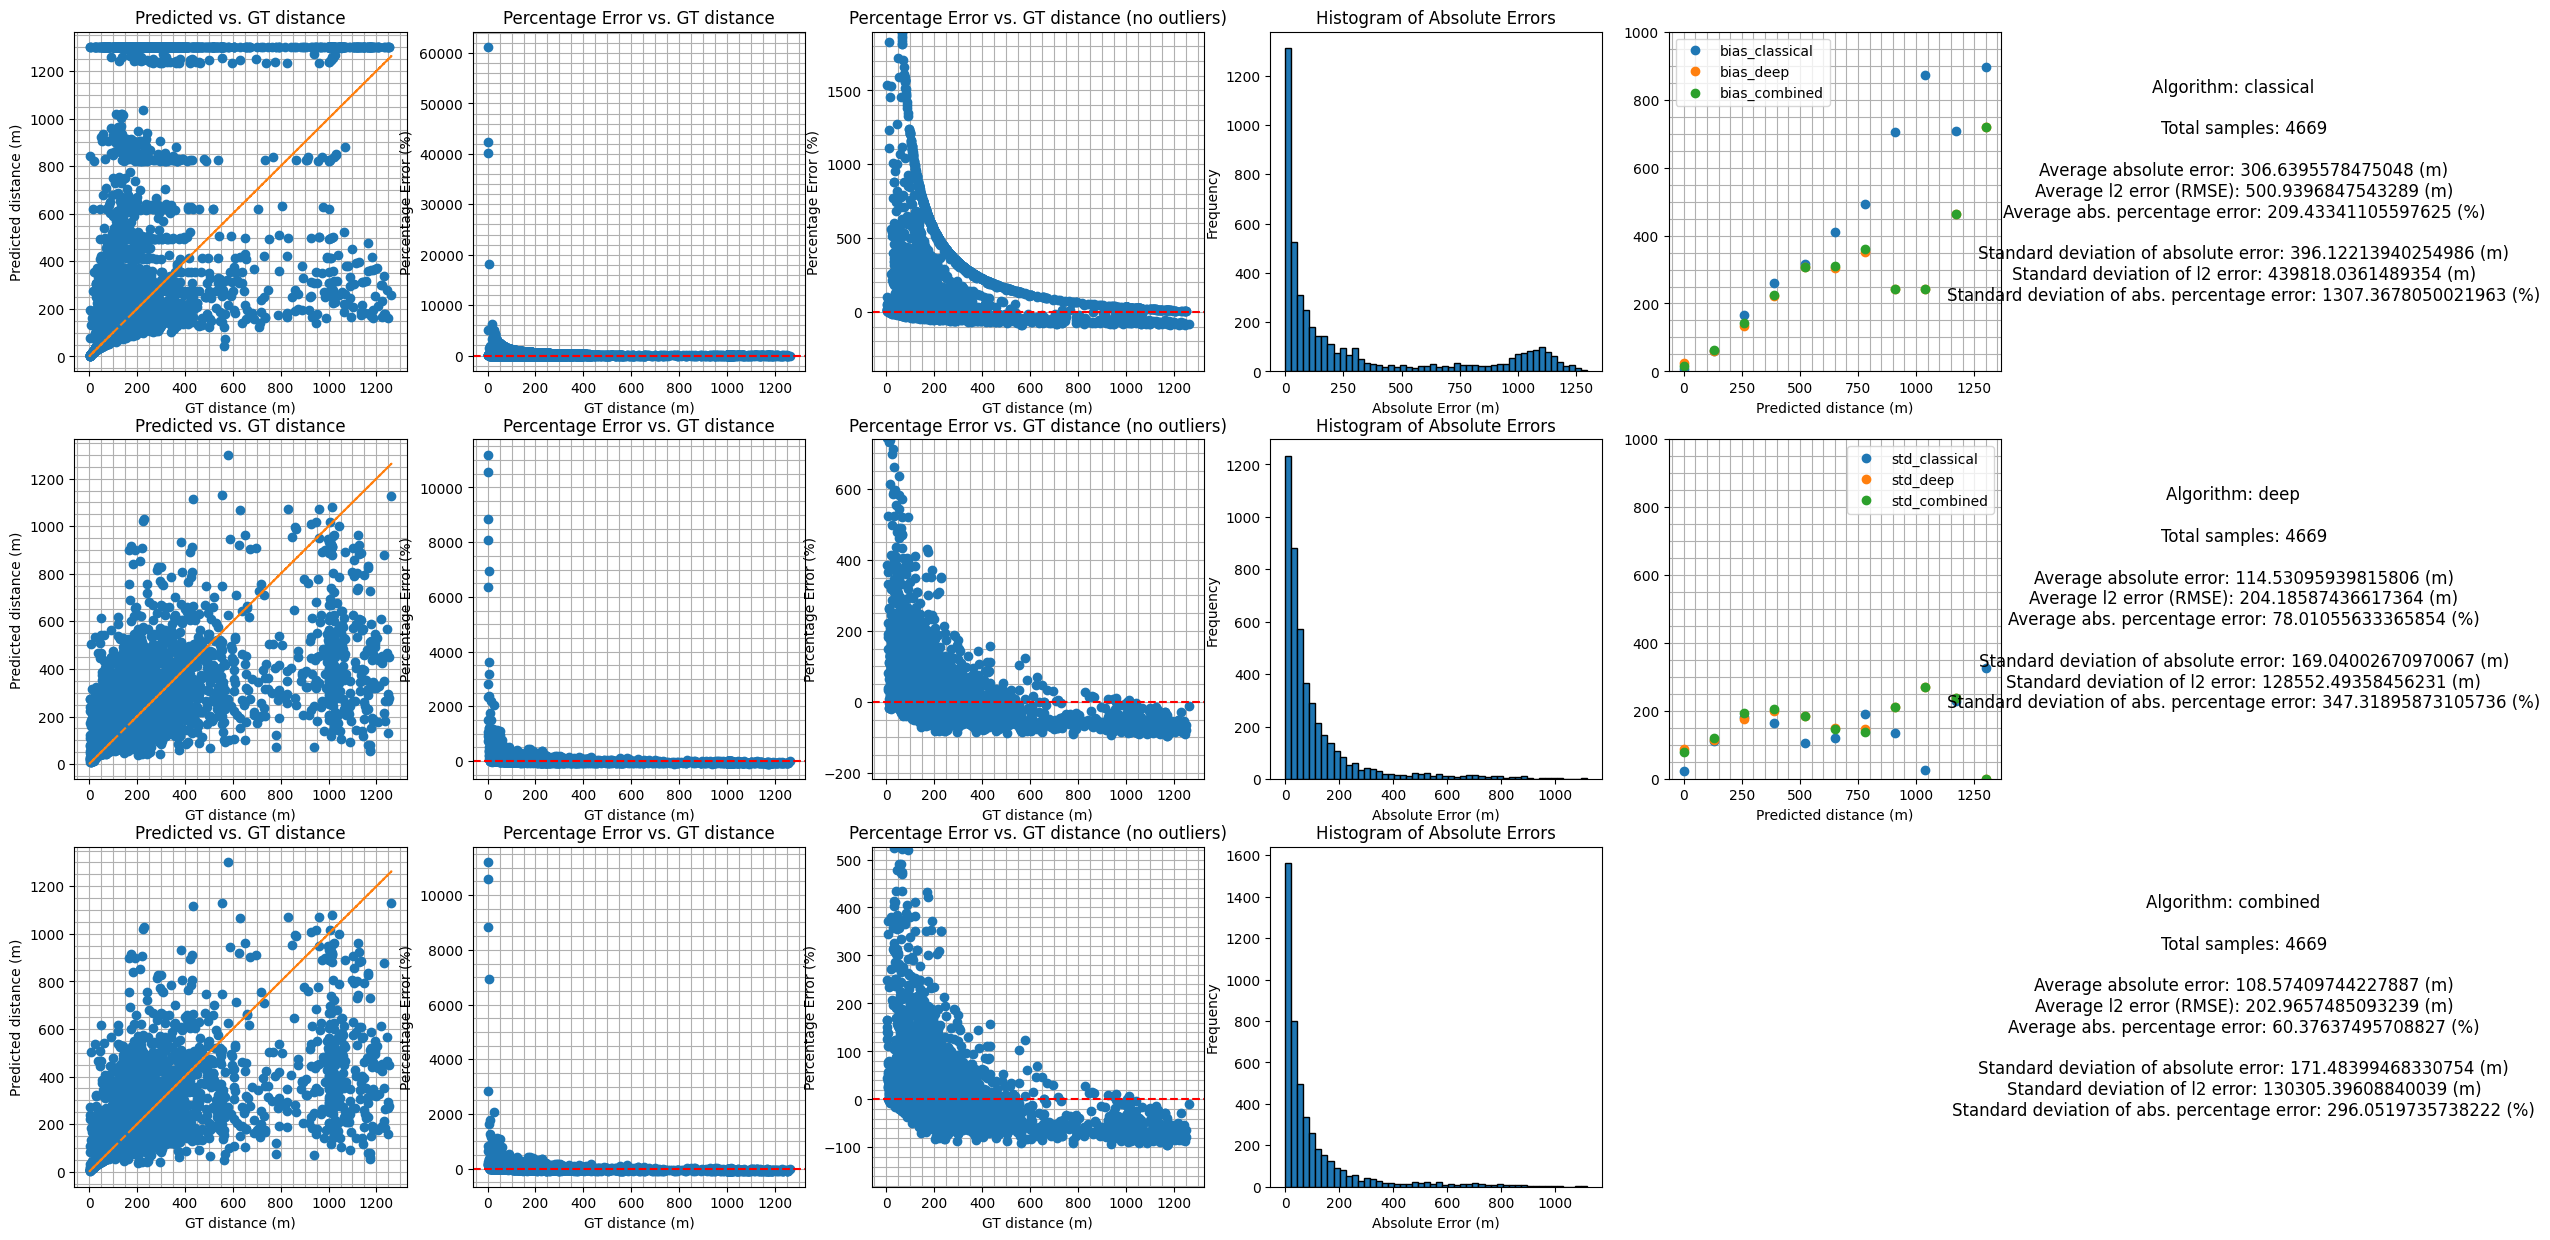

In [88]:
predicted_gt_deep_path = "/System/Volumes/Data/mnt/onurcan/ida/predicted_and_gt_distances.txt"
roll_pitch_noise_path = "/System/Volumes/Data/mnt/onurcan/ida/noise.txt"

with open(predicted_gt_deep_path) as predicted_f:
    predicted_gt_deep = predicted_f.readlines()

with open(roll_pitch_noise_path) as noise_f:
    noise = noise_f.readlines()

number_of_columns = 6
number_of_rows = 3

plt.figure(figsize=(5*number_of_columns, 5*number_of_rows))
algorithms = ["classical", "deep", "combined"]

for algorithm_i, algorithm in enumerate(algorithms):
    metrics = {
        'gt_distances': [],
        'predicted_distances': [],
        'abs_errors': [],
        'l2_errors': [],
    }
    
    for single_gt_deep in predicted_gt_deep:
        gt, classical_pred, deep_pred = list(map(float, single_gt_deep.split()))

        if algorithm == "classical":
            pred_algo = classical_pred
        elif algorithm == "deep":
            pred_algo = deep_pred
        elif algorithm == "combined":
            if classical_pred < 170:
                pred_algo = classical_pred
            else:
                pred_algo = deep_pred
                
        pred_algo = min(pred_algo, 1300)
        
        metrics['gt_distances'].append(gt)
        metrics['predicted_distances'].append(pred_algo)
        metrics['abs_errors'].append(np.abs(gt - pred_algo))
        metrics['l2_errors'].append((gt - pred_algo)**2)

    for key, value in metrics.items():
        metrics[key] = np.array(value)

    plt.subplot(number_of_rows, number_of_columns, 1+number_of_columns*algorithm_i)  # First subplot for Predicted vs. GT distance
    plt.plot(metrics['gt_distances'], metrics['predicted_distances'], 'o')
    plt.plot(metrics['gt_distances'], metrics['gt_distances'], "--")
    plt.title("Predicted vs. GT distance")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Predicted distance (m)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)

    # Calculate percentage error
    percentage_error = 100 * (metrics['predicted_distances'] - metrics['gt_distances']) / metrics['gt_distances']

    plt.subplot(number_of_rows, number_of_columns, 2+number_of_columns*algorithm_i)  # Second subplot for Percentage Error
    plt.plot(metrics['gt_distances'], percentage_error, 'o')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.title("Percentage Error vs. GT distance")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Percentage Error (%)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)

    plt.subplot(number_of_rows, number_of_columns, 3+number_of_columns*algorithm_i)
    ypbot = np.percentile(percentage_error, 1)
    yptop = np.percentile(percentage_error, 99)
    ypad = 0.2*(yptop - ypbot)
    ymin = ypbot - ypad
    ymax = yptop + ypad

    plt.plot(metrics['gt_distances'], percentage_error, 'o')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.title("Percentage Error vs. GT distance (no outliers)")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Percentage Error (%)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    plt.ylim([ymin, ymax])


    plt.subplot(number_of_rows, number_of_columns, 4+number_of_columns*algorithm_i)
    plt.hist(metrics["abs_errors"], bins=50, edgecolor='black')
    plt.title("Histogram of Absolute Errors")
    plt.xlabel("Absolute Error (m)")
    plt.ylabel("Frequency")
    
    # std deviation analysis for different predicted distances
    number_of_bins = 10
    max_distance_value = 1300
    # quantize
    quantized_gt_distances = np.round(metrics['predicted_distances'] / max_distance_value * number_of_bins) * max_distance_value / number_of_bins
    quantized_gt_distances = quantized_gt_distances.astype(int)
    # calculate std deviation
    biases = []
    std_deviations = []
    for quantized_gt_distance in np.unique(quantized_gt_distances):
        std_deviations.append(np.std(metrics['abs_errors'][quantized_gt_distances == quantized_gt_distance]))
        biases.append(np.mean(metrics['abs_errors'][quantized_gt_distances == quantized_gt_distance]))
    
    plt.subplot(number_of_rows, number_of_columns, 5+number_of_columns*0)
    plt.plot(np.unique(quantized_gt_distances), biases, 'o')
    plt.xlabel("Predicted distance (m)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    plt.ylim([0, 1000])
    plt.legend([f"bias_{algo}" for algo in algorithms])
    
    plt.subplot(number_of_rows, number_of_columns, 5+number_of_columns*1)
    plt.plot(np.unique(quantized_gt_distances), std_deviations, 'o')
    plt.xlabel("Predicted distance (m)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    plt.ylim([0, 1000])
    plt.legend([f"std_{algo}" for algo in algorithms])
    
    print(algorithm)
    print(np.unique(quantized_gt_distances), biases)
    print(np.unique(quantized_gt_distances), std_deviations)
    

    plt.subplot(number_of_rows, number_of_columns, 6+number_of_columns*algorithm_i)
    metrics_txt = f'''Algorithm: {algorithm}
    
    Total samples: {len(metrics['abs_errors'])}

    Average absolute error: {np.mean(metrics['abs_errors'])} (m)
    Average l2 error (RMSE): {np.sqrt(np.mean(metrics['l2_errors']))} (m)
    Average abs. percentage error: {np.mean(np.abs(percentage_error))} (%)

    Standard deviation of absolute error: {np.std(metrics['abs_errors'])} (m)
    Standard deviation of l2 error: {np.std(metrics['l2_errors'])} (m)
    Standard deviation of abs. percentage error: {np.std(np.abs(percentage_error))} (%)
    '''

    plt.text(0.5, 0.5, metrics_txt, fontsize=12, ha='center', va='center')
    plt.axis('off')  # Turn off axes for this subplot

optimal coefficients

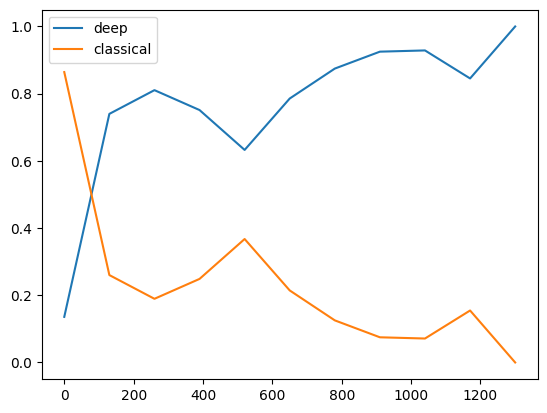

In [73]:
classical_std_for_different_distances = [23.893302092655635, 111.52977420874376, 183.31315467024413, 165.15826615949985, 104.99708442713633, 122.07336817178188, 190.90185070143548, 134.98288658947698, 27.091297898711584, 230.19111910375688, 326.5259173122863]
classical_bias_for_different_distances = [6.852307269076305, 60.3890519729425, 164.68773969343064, 260.0695636734694, 316.177171641791, 410.974, 493.8757571428571, 705.5996720588237, 872.941142857143, 708.5153999999999, 895.384560669145]

deep_std_for_different_distances = [87.40494875607027, 116.164250244894, 176.04785414212463, 198.9871123117687, 185.18448882206283, 150.28831397250377, 146.8782397511904, 210.79592841077732, 270.39504632927304, 237.3284345337115, 0.0]
deep_bias_for_different_distances = [24.755456145552564, 60.382784071494896, 133.06900223293172, 221.33433586337762, 307.1592915311005, 305.47727605633804, 352.0751428571429, 242.5542195121951, 243.18991666666668, 464.0346666666667, 719.241]

classical_combination_weights = [1/(1 + classical_std**2 / (deep_std + 1e-5)**2)  for (classical_std, deep_std) in zip(classical_std_for_different_distances, deep_std_for_different_distances)]
# dont want to make bias correction
classical_combination_weights = [weight * 1/(1 + classical_bias**2 / deep_bias**2) for (weight, classical_bias, deep_bias) in zip(classical_combination_weights, classical_bias_for_different_distances, deep_bias_for_different_distances)]
deep_combination_weights = [1-weight for weight in classical_combination_weights]

plt.plot(np.unique(quantized_gt_distances), deep_combination_weights)
plt.plot(np.unique(quantized_gt_distances), classical_combination_weights)
plt.legend(["deep", "classical"])

[   0  130  260  390  520  650  780  910 1040 1170 1300] 

In [1]:
gt_path = "/System/Volumes/Data/mnt_karagoz_nas/MARITIME/231025_colreg_recordings/itu_boat_tracking_scenario-2023-10-25T14-18-06/ida-resources/png-files-itu_boat_tracking_scenario-2023-10-25T14-18-06-BAG-3-4/rgb_front_bbox_gps_match.txt"
with open(gt_path) as predicted_f:
    gt_distances_lines = predicted_f.readlines()

gt_distances = {}

for i, line in enumerate(gt_distances_lines):
    gt_distance_gps, gt_distance_lidar = map(float, line.strip().split(',')[1:])
    gt_distances[float(i)] = gt_distance_lidar if gt_distance_lidar != 0 else gt_distance_gps
    
max_frame_index = max(gt_distances.keys())

In [2]:
from collections import defaultdict

predicted_net_deep_path = "/System/Volumes/Data/mnt/onurcan/ida_new/ida/distances.txt"
with open(predicted_net_deep_path) as predicted_f:
    predicted_deep_lines = predicted_f.readlines()
predicted_deep = defaultdict(list)
for predicted_line in predicted_deep_lines:
    frame_i, predicted_value = tuple(map(float, predicted_line.split()))
    if frame_i > max_frame_index:
        continue
    predicted_deep[frame_i].append(predicted_value)

for frame_index, predicted_values in predicted_deep.items():
    if len(predicted_values) > 1:
        # closest estimate to gt value
        closest_predicted_value = min(predicted_values, key=lambda x: abs(x - gt_distances[frame_index]))
        predicted_deep[frame_index] = closest_predicted_value
    else:
        predicted_deep[frame_index] = predicted_values[0]

In [3]:
predicted_classical_path = "/System/Volumes/Data/mnt/onurcan/ida_new/ida/distances_classical.txt"
with open(predicted_classical_path) as predicted_f:
    predicted_classical_lines = predicted_f.readlines()
predicted_classical = defaultdict(list)
for predicted_line in predicted_classical_lines:
    frame_i, predicted_value = tuple(map(float, predicted_line.split()))
    if frame_i > max_frame_index:
        continue
    predicted_classical[frame_i].append(predicted_value)

for frame_index, predicted_values in predicted_classical.items():
    if len(predicted_values) > 1:
        # closest estimate to gt value
        closest_predicted_value = min(predicted_values, key=lambda x: abs(x - gt_distances[frame_index]))
        predicted_classical[frame_index] = closest_predicted_value
    else:
        predicted_classical[frame_index] = predicted_values[0]

In [4]:
intersected_frame_indices = set(predicted_classical.keys()) & set(predicted_deep.keys())

predicted_classical = [predicted_classical[frame_index] for frame_index in intersected_frame_indices]
predicted_deep = [predicted_deep[frame_index] for frame_index in intersected_frame_indices]
gt_distances = [gt_distances[frame_index] for frame_index in intersected_frame_indices]

In [5]:
len(gt_distances)

369

In [6]:
import numpy as np

predicted_classical = np.array(predicted_classical)[:-20]
predicted_deep = np.array(predicted_deep)[:-20]
gt_distances = np.array(gt_distances)[:-20]

predicted_combined = np.array([p_c if p_c < 170.0 else p_d for p_d, p_c in zip(predicted_deep, predicted_classical)])

In [7]:
print(np.abs(predicted_classical - gt_distances).mean())
print(np.abs(predicted_deep - gt_distances).mean())
print(np.abs(predicted_combined - gt_distances).mean())

217.76731363727754
80.14720418952666
118.8743757981793


In [8]:
for classical_estimate, deep_estimate, gt_distance in zip(predicted_classical, predicted_deep, gt_distances):
    print(classical_estimate, deep_estimate, gt_distance)

275.303101 506.6624287651597 727.9310585303194
233.463425 519.0762323068022 727.9440296136045
227.900497 504.9464565986629 726.2064511973258
227.900497 514.5102690986629 726.2064511973258
227.920242 504.13619504118594 726.2446190823719
227.940109 504.3751038079033 726.2530156158066
233.544586 501.8629756611982 726.2614123223965
233.57547 499.5633560984207 726.2698091968414
233.596191 493.3028399433683 724.7593968867366
228.051239 504.9676297414584 724.7998224829167
260.457581 506.74326509525633 724.8105051905127
228.061508 504.83564585819624 722.8046837163924
228.092438 508.70058433558927 722.8269806711786
228.250717 513.9363907403149 719.5641264806299
228.29393 508.1612927166726 719.5973654333453
233.964996 501.9324738395326 719.6282536790652
234.102585 501.3257213381071 714.8685146762142
234.196442 508.8042661026643 714.8969842053286
234.328293 508.6531474475019 714.8993738950038
223.632477 508.0231962345133 707.9774834690267
228.992432 506.0039622537927 707.9857075075854
223.681152 

In [9]:
import matplotlib.pyplot as plt

classical
[  0  80 160 240 320] [500.84064656548816, 62.66839927513945, 171.54168296862497, 382.8319992746791, 84.3032511550314]
[  0  80 160 240 320] [71.987483976851, 18.637057041348296, 52.30882962219734, 91.15457115113911, 0.0]
deep
[ 80 160 240 320 400 480] [20.840215137063606, 30.509623425288154, 39.517160826568414, 71.8592662245953, 103.20801652280757, 183.51222286082847]
[ 80 160 240 320 400 480] [7.831100645311325, 18.22012205961091, 28.339767171224604, 41.43323278628583, 34.75102139090842, 28.047790118035152]
combined
[  0  80 160 240 320 400 480] [500.84064656548816, 62.66839927513945, 128.90218157264485, 100.44362522355644, 79.16764674584569, 101.79008867538502, 184.04799779884874]
[  0  80 160 240 320 400 480] [71.987483976851, 18.637057041348296, 31.17221028937789, 70.9900913277996, 42.313628667230326, 35.748060621637165, 27.92553779912952]


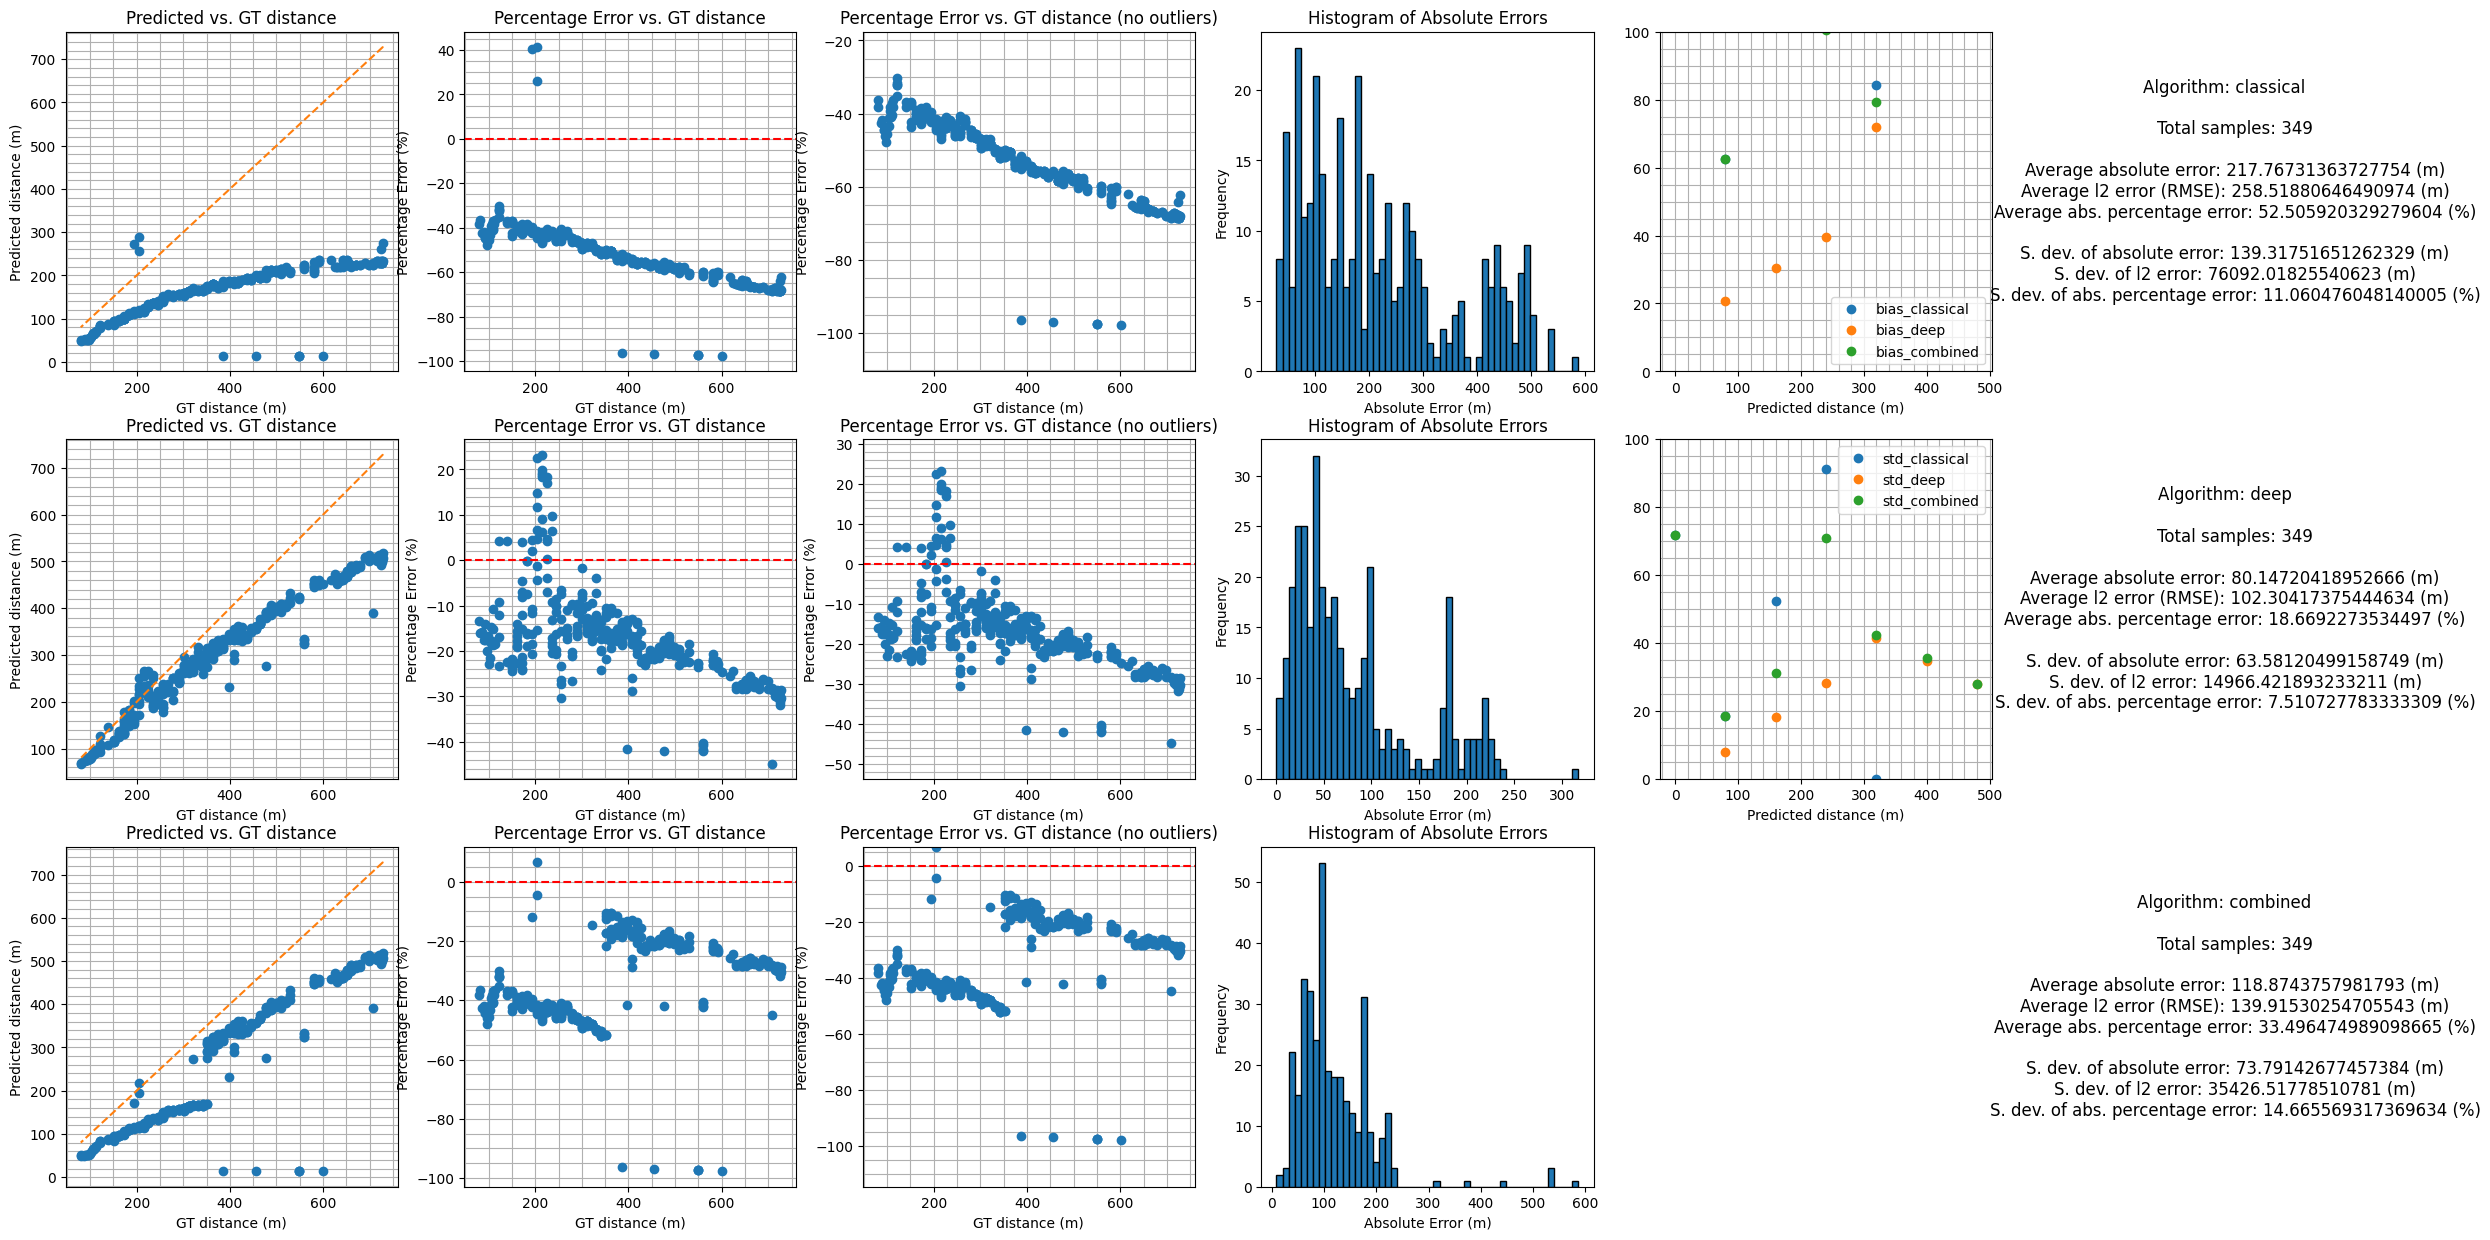

In [10]:
number_of_columns = 6
number_of_rows = 3

plt.figure(figsize=(5*number_of_columns, 5*number_of_rows))
algorithms = ["classical", "deep", "combined"]
predictions = {
    "classical": predicted_classical,
    "deep": predicted_deep,
    "combined": predicted_combined,
}

for algorithm_i, algorithm in enumerate(algorithms):
    metrics = {
        'gt_distances': gt_distances,
        'predicted_distances': predictions[algorithm],
        'abs_errors': np.abs(predictions[algorithm] - gt_distances),
        'l2_errors': (predictions[algorithm] - gt_distances)**2,
    }


    plt.subplot(number_of_rows, number_of_columns, 1+number_of_columns*algorithm_i)  # First subplot for Predicted vs. GT distance
    plt.plot(metrics['gt_distances'], metrics['predicted_distances'], 'o')
    plt.plot(metrics['gt_distances'], metrics['gt_distances'], "--")
    plt.title("Predicted vs. GT distance")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Predicted distance (m)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)

    # Calculate percentage error
    percentage_error = 100 * (metrics['predicted_distances'] - metrics['gt_distances']) / metrics['gt_distances']

    plt.subplot(number_of_rows, number_of_columns, 2+number_of_columns*algorithm_i)  # Second subplot for Percentage Error
    plt.plot(metrics['gt_distances'], percentage_error, 'o')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.title("Percentage Error vs. GT distance")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Percentage Error (%)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)

    plt.subplot(number_of_rows, number_of_columns, 3+number_of_columns*algorithm_i)
    ypbot = np.percentile(percentage_error, 1)
    yptop = np.percentile(percentage_error, 99)
    ypad = 0.2*(yptop - ypbot)
    ymin = ypbot - ypad
    ymax = yptop + ypad

    plt.plot(metrics['gt_distances'], percentage_error, 'o')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
    plt.title("Percentage Error vs. GT distance (no outliers)")
    plt.xlabel("GT distance (m)")
    plt.ylabel("Percentage Error (%)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    plt.ylim([ymin, ymax])


    plt.subplot(number_of_rows, number_of_columns, 4+number_of_columns*algorithm_i)
    plt.hist(metrics["abs_errors"], bins=50, edgecolor='black')
    plt.title("Histogram of Absolute Errors")
    plt.xlabel("Absolute Error (m)")
    plt.ylabel("Frequency")
    
    # std deviation analysis for different predicted distances
    number_of_bins = 10
    max_distance_value = 800
    # quantize
    quantized_gt_distances = np.round(metrics['predicted_distances'] / max_distance_value * number_of_bins) * max_distance_value / number_of_bins
    quantized_gt_distances = quantized_gt_distances.astype(int)
    # calculate std deviation
    biases = []
    std_deviations = []
    for quantized_gt_distance in np.unique(quantized_gt_distances):
        std_deviations.append(np.std(metrics['abs_errors'][quantized_gt_distances == quantized_gt_distance]))
        biases.append(np.mean(metrics['abs_errors'][quantized_gt_distances == quantized_gt_distance]))
    
    plt.subplot(number_of_rows, number_of_columns, 5+number_of_columns*0)
    plt.plot(np.unique(quantized_gt_distances), biases, 'o')
    plt.xlabel("Predicted distance (m)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    plt.ylim([0, 100])
    plt.legend([f"bias_{algo}" for algo in algorithms])
    
    plt.subplot(number_of_rows, number_of_columns, 5+number_of_columns*1)
    plt.plot(np.unique(quantized_gt_distances), std_deviations, 'o')
    plt.xlabel("Predicted distance (m)")
    plt.grid(which="both")
    plt.minorticks_on()
    plt.tick_params(which="minor", bottom=False, left=False)
    plt.ylim([0, 100])
    plt.legend([f"std_{algo}" for algo in algorithms])
    
    print(algorithm)
    print(np.unique(quantized_gt_distances), biases)
    print(np.unique(quantized_gt_distances), std_deviations)
    

    plt.subplot(number_of_rows, number_of_columns, 6+number_of_columns*algorithm_i)
    metrics_txt = f'''Algorithm: {algorithm}
    
    Total samples: {len(metrics['abs_errors'])}

    Average absolute error: {np.mean(metrics['abs_errors'])} (m)
    Average l2 error (RMSE): {np.sqrt(np.mean(metrics['l2_errors']))} (m)
    Average abs. percentage error: {np.mean(np.abs(percentage_error))} (%)

    S. dev. of absolute error: {np.std(metrics['abs_errors'])} (m)
    S. dev. of l2 error: {np.std(metrics['l2_errors'])} (m)
    S. dev. of abs. percentage error: {np.std(np.abs(percentage_error))} (%)
    '''

    plt.text(0.5, 0.5, metrics_txt, fontsize=12, ha='center', va='center')
    plt.axis('off')  # Turn off axes for this subplot